<a href="https://colab.research.google.com/github/kernelmans/my-ai-codes/blob/main/vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports
import tensorflow as tf
import numpy as np

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Callbacks - stops training at a particular accuracy percentage to avoid overfitting

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')  > 0.95):
      print("\n Reached 95% accuracy so cancelling training")
      self.model.stop_training = True

callbacks = myCallback()

#Data
data = tf.keras.datasets.fashion_mnist

#Train and Test split
(training_images, training_labels), (test_images, test_labels) = data.load_data()

#Normalize images (0 - 255)
training_images = training_images / 255.0
test_images = test_images / 255.0

#Define
model = Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

#compile
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#fit
model.fit(training_images, training_labels, epochs = 50, callbacks=[callbacks])

#evaluate
model.evaluate(test_images, test_labels)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7790 - loss: 0.6437
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8603 - loss: 0.3885
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8752 - loss: 0.3418
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8853 - loss: 0.3127
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8919 - loss: 0.2945
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8988 - loss: 0.2756
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9003 - loss: 0.2671
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9055 - loss: 0.2538
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9087 - loss: 0.2426
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9101 - loss: 0.2392
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9137 - loss: 0.2279
Epoch 12/50
1875/1875 ━━━━━━━━

[0.4225807189941406, 0.8877999782562256]

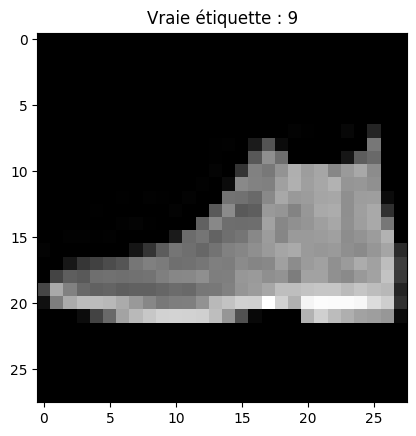

In [3]:
import matplotlib.pyplot as plt

# Affichage de l'image pour vérification visuelle
plt.imshow(test_images[0], cmap='gray')
plt.title(f"Vraie étiquette : {test_labels[0]}")
plt.show()

In [4]:
import numpy as np

# Le modèle attend un batch, donc on ajoute une dimension [1, 28, 28]
img = np.expand_dims(test_images[0], axis=0)

In [5]:
prediction = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [6]:
print("Probabilités :", prediction)
print("Classe prédite :", np.argmax(prediction))
print("Vraie classe :", test_labels[0])

Probabilités : [[6.8639118e-12 2.4765328e-18 5.5222076e-14 6.9125963e-25 9.6975447e-14
  6.8184131e-06 7.1464678e-15 3.9399338e-06 3.4616513e-15 9.9998927e-01]]
Classe prédite : 9
Vraie classe : 9


In [7]:
# Liste des noms des classes Fashion MNIST
class_names = ['T-shirt/top', 'Pantalon', 'Pull', 'Robe', 'Manteau',
               'Sandale', 'Chemise', 'Baskets', 'Sac', 'Botte']

predicted_label = np.argmax(prediction)
true_label = test_labels[0]

print(f"Prédiction : {class_names[predicted_label]} ({predicted_label})")
print(f"Vérité terrain : {class_names[true_label]} ({true_label})")

Prédiction : Botte (9)
Vérité terrain : Botte (9)


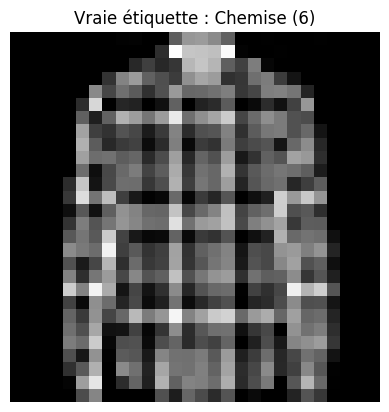

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Probabilités par classe :
  T-shirt/top (0) : 0.0000
  Pantalon (1) : 0.0000
  Pull (2) : 0.0001
  Robe (3) : 0.0000
  Manteau (4) : 0.0022
  Sandale (5) : 0.0000
  Chemise (6) : 0.9978
  Baskets (7) : 0.0000
  Sac (8) : 0.0000
  Botte (9) : 0.0000

🔮 Prédiction finale : Chemise (6)
✅ Vraie étiquette    : Chemise (6)


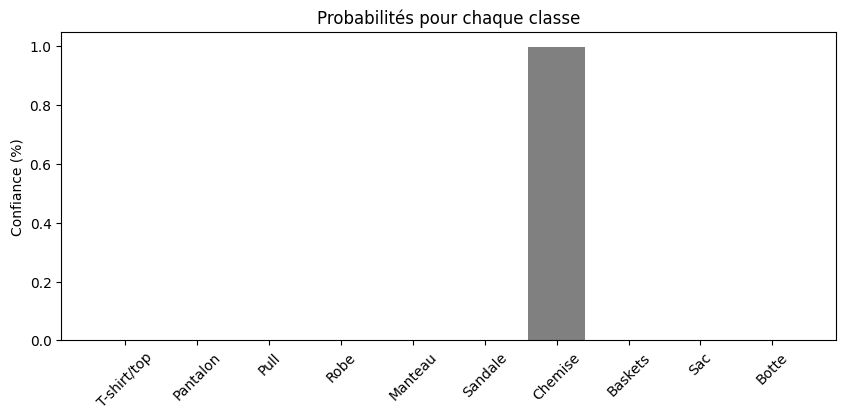

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Noms des classes
class_names = ['T-shirt/top', 'Pantalon', 'Pull', 'Robe', 'Manteau',
               'Sandale', 'Chemise', 'Baskets', 'Sac', 'Botte']

# Choisir l’image numéro 7
i = 7

# 1. Afficher l’image avec la vraie étiquette
plt.imshow(test_images[i], cmap='gray')
plt.title(f"Vraie étiquette : {class_names[test_labels[i]]} ({test_labels[i]})")
plt.axis('off')
plt.show()

# 2. Préparer l’image (ajouter la dimension du batch)
img = np.expand_dims(test_images[i], axis=0)

# 3. Prédiction
prediction = model.predict(img)

# 4. Résultat
predicted_label = np.argmax(prediction)
true_label = test_labels[i]

# 5. Affichage texte
print("Probabilités par classe :")
for idx, prob in enumerate(prediction[0]):
    print(f"  {class_names[idx]} ({idx}) : {prob:.4f}")

print("\n🔮 Prédiction finale :", class_names[predicted_label], f"({predicted_label})")
print("✅ Vraie étiquette    :", class_names[true_label], f"({true_label})")

# 6. Affichage des probabilités sous forme de barres
plt.figure(figsize=(10, 4))
plt.bar(range(10), prediction[0], color='gray')
plt.xticks(range(10), class_names, rotation=45)
plt.title("Probabilités pour chaque classe")
plt.ylabel("Confiance (%)")
plt.show()

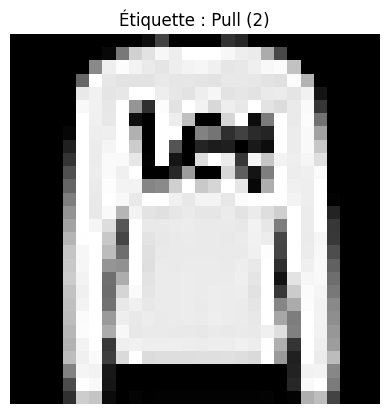

In [13]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Pantalon', 'Pull', 'Robe', 'Manteau',
               'Sandale', 'Chemise', 'Baskets', 'Sac', 'Botte']

i = 1
plt.imshow(test_images[i], cmap='gray')
plt.title(f"Étiquette : {class_names[test_labels[i]]} ({test_labels[i]})")
plt.axis('off')
plt.show()